In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비
* 각 변수의 의미 파악
* 각 변수의 데이터 유형
* 각 변수의 분포와 특성 파악
* 결측치/이상치 파악
* 집값 예측을 위한 후보변수 선택

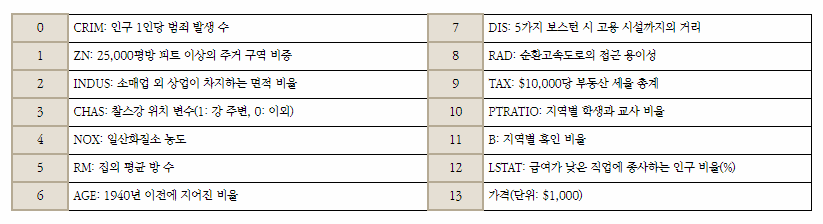

In [3]:
df = pd.read_csv('data/boston.csv')
# df.head()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [31]:
# df[df['CRIM'] > 50]
# df[df['ZN']!=0]
# df[df['CHAS'].isin([0,1])]
df[df['RAD'] > 23.0]
# df[df['TAX'] > 710]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42,21.8
484,2.37857,0.0,18.1,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
485,3.67367,0.0,18.1,0.0,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,21.2
486,5.69175,0.0,18.1,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1


위의 정보표와 데이터를 보니까 MEDV 컬럼이 정답레이블(주택가격) 으로 보임

CRIM은 낮은 값이 엄청 많아보이고, ZN은 출력해보니 0값이 많길래 의미없는 컬럼인줄 알았는데 생각보다 0이 아닌 값이 많음

나머지는 큰 특징 없는듯

이제 제대로된 데이터 탐색 & 분석

#### 데이터 탐색

In [14]:
# 데이터 타입, 결측치 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


데이터 결측치 0, 타입은 전부 float

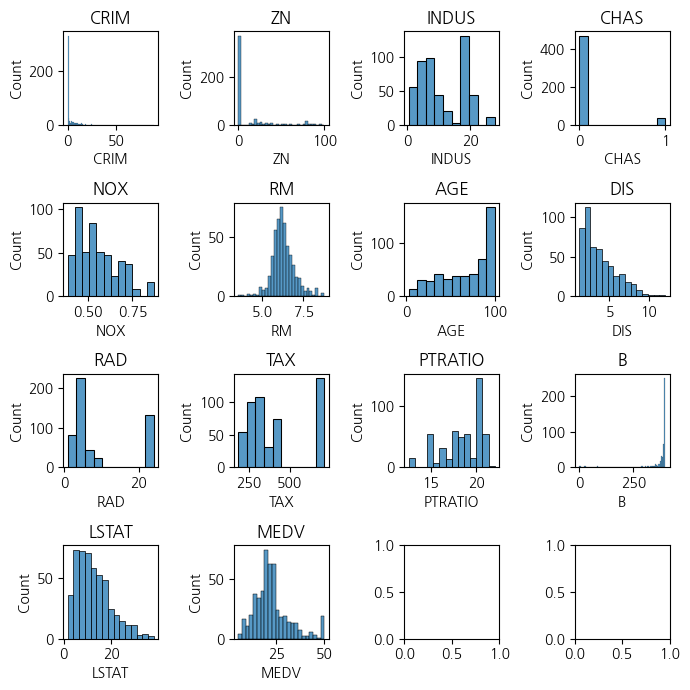

In [19]:
# 시각화

# 전부 float 형식이니 산점도로 분포 확인해보기

cols = df.columns

fig, ax = plt.subplots(4,4, figsize=(7,7))
ax = ax.flatten()

for i, col in enumerate(cols) :
    sns.histplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()

분포를 보니 역시 낮은 값들이 너무 많은 CRIM 데이터, ZN 데이터 등은 정규화가 필요해보이고
높은값에만 치우쳐진 B 데이터도 정규화가 필요해보임
애초에 0 또는 1값이었던 CHAS 데이터는 범주형 데이터로 만드는것이 좋아보임
TAX 데이터는 아까 보니까 711 인 데이터가 몇개 있던데 딱히 이상치 정도까지로는 생각하지 않고
RAD 값도 아까 보니까 이상하게 24인 값이 130 몇개 되는 등 분포가 동떨어져있어서 정규화 필요해보임

근데 생각해보니 확실한 범주형 데이터인 CHAS 데이터 빼고 전부 정규화하면 될듯 (정답 레이블인 MEDV도 물론 제외하고)

범주형 데이터 = 'CHAS'
수치형 데이터 = 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'

( 원래는 범주형 데이터들은 categorical 한 데이터로 바꿔주고 원핫인코딩도 해야하지만, 아직 안배웠으므로 그냥 정규화에서 제외하는 정도만 하기 )

정규화(스케일링)할 데이터 = 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

In [ ]:
# cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

#### 변수 선택

In [35]:
X = df.drop(['MEDV'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [39]:
# 독립변수, 종속변수 선택

X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

print(X.head())
print(y.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [40]:
# 독립변수 구분

cat_cols = ['CHAS']
num_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

#### 훈련세트, 테스트세트 분할

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [102]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
430,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45
187,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49


In [103]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
249,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
69,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


#### 데이터 전처리 - 스케일링

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = scaler.fit_transform(X_train[num_cols]).copy()
test_scaled = scaler.transform(X_test[num_cols]).copy()

# 각각 일단 X_train, X_test를 할당하고, num_cols 리스트와 동일한 이름을 가진 컬럼의 값들을 스케일링한 값(train_scaled, test_scaled) 로 바꾸기
X_train_scaled = X_train
X_train_scaled[num_cols] = train_scaled

X_test_scaled = X_test
X_test_scaled[num_cols] = test_scaled

In [105]:
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
430,0.646357,-0.482300,1.052358,0.0,0.270713,0.118450,0.625257,-0.825914,1.647922,1.519984,0.769482,-2.939666,0.729591
186,-0.433233,-0.482300,-1.240529,0.0,-0.569305,2.236670,-0.523550,-0.289329,-0.758208,-1.297455,-0.337988,0.388712,-1.155177
187,-0.430324,1.430859,-1.096857,0.0,-1.015564,0.738347,-0.965399,-0.013477,-0.529052,-0.076366,-1.537746,0.402061,-0.836524
496,-0.403341,-0.482300,-0.180582,0.0,0.279463,-1.249894,0.158665,-0.476818,-0.414475,-0.118062,0.308036,0.434680,1.229719
351,-0.430228,2.068579,-1.353414,0.0,-1.243069,0.448395,-1.149209,3.226019,-0.643630,0.001069,-0.107265,0.153493,-1.006567
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.431874,-0.482300,-1.007429,0.0,-0.376801,0.401260,-1.248183,-0.320639,-0.529052,-0.683932,-0.891722,0.370735,-1.029430
437,1.501862,-0.482300,1.052358,0.0,1.635742,-0.161504,1.116593,-0.890735,1.647922,1.519984,0.769482,-3.737688,1.988484
297,-0.422354,-0.482300,0.439553,0.0,-1.015564,-0.678561,-0.368019,1.171269,-0.643630,-0.725628,-1.168590,0.434680,0.472382
265,-0.342936,0.367993,-1.019157,0.0,0.821975,-1.007078,-0.198349,-0.856897,-0.529052,-0.874541,-2.552926,0.386236,-0.297815


In [108]:
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
249,-0.415994,0.453022,-0.742075,0.0,-1.068065,0.646934,-1.799610,1.876342,-0.299897,-0.481410,0.261892,0.400662,-0.853671
52,-0.433543,0.410508,-0.774328,0.0,-0.998064,0.351269,-1.672358,1.402799,-0.643630,-0.999628,-0.799433,0.434680,-1.036575
69,-0.424001,0.049133,-0.711289,0.0,-1.260569,-0.542869,-1.251718,1.254577,-0.643630,-0.392062,0.169603,0.434680,-0.535018
414,5.413839,-0.482300,1.052358,0.0,1.224484,-2.493974,1.116593,-1.010548,1.647922,1.519984,0.769482,-2.887777,3.493155
78,-0.433177,-0.482300,0.279754,0.0,-1.015564,-0.047237,-0.520016,0.560082,-0.529052,-0.076366,0.077313,0.321645,-0.027746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-0.426377,-0.482300,0.147811,0.0,0.174461,0.755487,0.738371,-0.668566,-0.987363,-0.820932,1.138638,0.397540,-0.865103
113,-0.411977,-0.482300,-0.133669,0.0,-0.053044,-0.247204,0.953993,-0.594103,-0.414475,0.126156,-0.337988,0.434680,0.651000
278,-0.430192,1.218286,-0.661443,0.0,-0.928062,0.309847,-1.283531,0.151125,-0.643630,-0.934106,-0.430277,0.434680,-0.763648
134,-0.315479,-0.482300,1.607987,0.0,0.620721,-0.725696,1.060037,-0.688644,-0.643630,0.155938,1.230927,-1.009361,0.682436


#### 예측 및 평가

In [109]:
# 모델 생성, 훈련

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train_scaled, y_train)

# 테스트세트로 예측 

y_pred = model.predict(X_test_scaled)

# 평가

from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'r2 상관계수 : {r2:.3f}')
print(f'rmse : {rmse:.3f}')
print(f'mae : {mae:.3f}')
print(f'mse : {mse:.3f}')

r2 상관계수 : 0.923
rmse : 2.690
mae : 1.944
mse : 7.238
